In [2]:
import torch
from torch import nn

from torchvision import datasets, transforms

transform = transforms.ToTensor()

# download the Fashion-MNIST dataset
train_data = datasets.FashionMNIST(root="./data", train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(root="./data", train=False, download=True, transform=transform)

# prepare the data
X_train = train_data.data.view(-1, 28*28).float() / 255.0
y_train = train_data.targets

X_test = test_data.data.view(-1, 28*28).float() / 255.0
y_test = test_data.targets

In [24]:

class LogisticRegression(nn.Module):
    def __init__(self, in_features, num_classes):
        super().__init__()

        self.linear = nn.Linear(in_features, num_classes)

    def forward(self, x):
        x = self.linear(x)
        return x

Epoch 1: Train loss 0.5424, Train accuracy 0.8202, Test loss 0.5683, Test accuracy 0.8082
Epoch 2: Train loss 0.4850, Train accuracy 0.8371, Test loss 0.5166, Test accuracy 0.8221
Epoch 3: Train loss 0.4554, Train accuracy 0.8472, Test loss 0.4901, Test accuracy 0.8338
Epoch 4: Train loss 0.4470, Train accuracy 0.8452, Test loss 0.4849, Test accuracy 0.8302
Epoch 5: Train loss 0.4257, Train accuracy 0.8561, Test loss 0.4667, Test accuracy 0.8378
Epoch 6: Train loss 0.4183, Train accuracy 0.8580, Test loss 0.4621, Test accuracy 0.8377
Epoch 7: Train loss 0.4127, Train accuracy 0.8585, Test loss 0.4586, Test accuracy 0.8390
Epoch 8: Train loss 0.4045, Train accuracy 0.8626, Test loss 0.4511, Test accuracy 0.8422
Epoch 9: Train loss 0.4189, Train accuracy 0.8548, Test loss 0.4674, Test accuracy 0.8375
Epoch 10: Train loss 0.3998, Train accuracy 0.8631, Test loss 0.4487, Test accuracy 0.8418
Epoch 11: Train loss 0.3965, Train accuracy 0.8647, Test loss 0.4469, Test accuracy 0.8440
Epoch 12

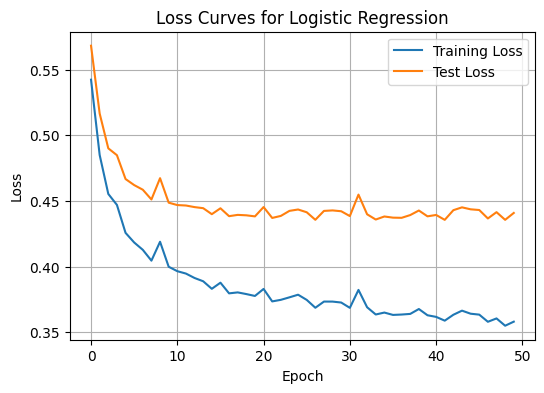

In [ ]:
from matplotlib import pyplot as plt
from torch.utils.data import DataLoader, TensorDataset

log_reg = LogisticRegression(28*28, 10)

optimizer = torch.optim.Adam(log_reg.parameters(), lr=0.001)

loss_function = nn.CrossEntropyLoss()
train_losses = []
test_losses = []

train_dataset = TensorDataset(X_train, train_data.targets)
data_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

for epoch in range(10):
    # training
    for X_batch, y_batch in data_loader:
        y_train_pred = log_reg(X_batch)
        loss = loss_function(y_train_pred, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # training accuracy
    y_train_pred = log_reg(X_train)
    train_loss = loss_function(y_train_pred, y_train)
    train_losses.append(train_loss.item())

    y_train_pred = torch.argmax(y_train_pred, dim=1)
    train_accuracy = (y_train_pred == y_train).float().mean().item()

    # testing accuracy
    y_pred = log_reg(X_test)
    test_loss = loss_function(y_pred, y_test)
    test_losses.append(test_loss.item())

    y_pred = torch.argmax(y_pred, dim=1)
    accuracy = (y_pred == y_test).float().mean().item()

    print(f"Epoch {epoch + 1}: Train loss {train_loss:.4f}, Train accuracy {train_accuracy:.4f}, Test loss {test_loss:.4f}, Test accuracy {accuracy:.4f}")

# training loss curve
plt.figure(figsize=(6, 4))
plt.plot(train_losses, label="Training Loss")
plt.plot(test_losses, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curves for Logistic Regression")
plt.legend()
plt.grid()
plt.show()

In [35]:
class MultiLayerPerceptron(nn.Module):
    def __init__(self, in_features=784, num_classes=10, H=512):
        super().__init__()

        self.linear1 = nn.Linear(in_features, H)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(H, num_classes)

    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x

Epoch 1: Train loss 0.4159, Train accuracy 0.8487, Test loss 0.4570, Test accuracy 0.8329
Epoch 2: Train loss 0.3850, Train accuracy 0.8555, Test loss 0.4310, Test accuracy 0.8415
Epoch 3: Train loss 0.3039, Train accuracy 0.8895, Test loss 0.3590, Test accuracy 0.8730
Epoch 4: Train loss 0.2772, Train accuracy 0.8993, Test loss 0.3427, Test accuracy 0.8763
Epoch 5: Train loss 0.2674, Train accuracy 0.9033, Test loss 0.3380, Test accuracy 0.8808
Epoch 6: Train loss 0.2597, Train accuracy 0.9039, Test loss 0.3393, Test accuracy 0.8769
Epoch 7: Train loss 0.2469, Train accuracy 0.9088, Test loss 0.3342, Test accuracy 0.8775
Epoch 8: Train loss 0.2396, Train accuracy 0.9119, Test loss 0.3283, Test accuracy 0.8830
Epoch 9: Train loss 0.2230, Train accuracy 0.9185, Test loss 0.3237, Test accuracy 0.8822
Epoch 10: Train loss 0.2362, Train accuracy 0.9129, Test loss 0.3414, Test accuracy 0.8810
Epoch 11: Train loss 0.2081, Train accuracy 0.9234, Test loss 0.3201, Test accuracy 0.8873
Epoch 12

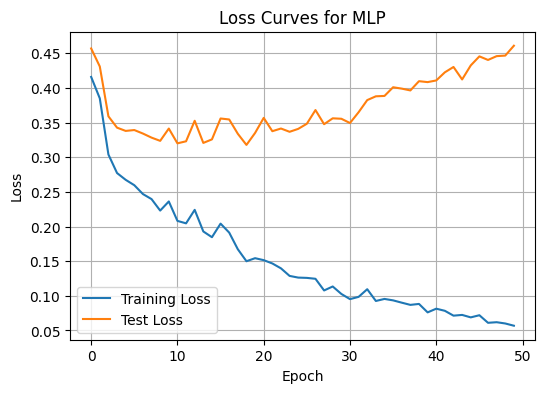

In [ ]:
from matplotlib import pyplot as plt
from torch.utils.data import DataLoader, TensorDataset

mlp = MultiLayerPerceptron(28*28, 10, 512)

optimizer = torch.optim.Adam(mlp.parameters(), lr=0.001)

loss_function = nn.CrossEntropyLoss()
train_losses = []
test_losses = []

train_dataset = TensorDataset(X_train, train_data.targets)
data_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

for epoch in range(10):
    for X_batch, y_batch in data_loader:
        y_train_pred = mlp(X_batch)
        loss = loss_function(y_train_pred, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # training accuracy
    y_train_pred = mlp(X_train)
    train_loss = loss_function(y_train_pred, y_train)
    train_losses.append(train_loss.item())

    y_train_pred = torch.argmax(y_train_pred, dim=1)
    train_accuracy = (y_train_pred == y_train).float().mean().item()

    # testing accuracy
    y_pred = mlp(X_test)
    test_loss = loss_function(y_pred, y_test)
    test_losses.append(test_loss.item())

    y_pred = torch.argmax(y_pred, dim=1)
    accuracy = (y_pred == y_test).float().mean().item()

    print(f"Epoch {epoch + 1}: Train loss {train_loss:.4f}, Train accuracy {train_accuracy:.4f}, Test loss {test_loss:.4f}, Test accuracy {accuracy:.4f}")

# training loss curve
plt.figure(figsize=(6, 4))
plt.plot(train_losses, label="Training Loss")
plt.plot(test_losses, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curves for MLP")
plt.legend()
plt.grid()
plt.show()